In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
happiness=pd.read_csv('happiness_score_dataset.csv')

df=happiness.copy()

df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

All columns except Country and Region are of numerical dtype, so the columns with object dtype needs to be encoded with suitable means if they are found useful for predicting the target (' Happiness Score'). 

In [3]:
df['Country'].value_counts()

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64

In [4]:
df['Region'].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1. Standard Error: The standard error ranges from 0.018 to 0.137. The small mean and median values indicate that the estimates of happiness scores are generally precise, with little variation.

2. Economy: GDP per capita values range from 0 to 1.69. With a mean of 0.846 and a median of 0.91, the distribution suggests that most countries have a moderate GDP per capita, with a few outliers on the higher end.


3. Family support values range from 0 to 1.402. The mean is 0.991 and the median is 1.03

4. Health : Life expectancy values range from 0 to 1.025. The mean of 0.63 and median of 0.697 show that life expectancy is generally good, though there are variations among countries.

5. Freedom: Freedom values range from 0 to 0.67. The mean and median (0.429 and 0.436) indicate moderate levels of perceived freedom across countries.

6. Trust: Trust in government corruption ranges from 0 to 0.552. The low mean (0.143) and median (0.107) suggest that trust in government is generally low across most countries.

7. Generosity: Generosity scores range from 0 to 0.796. The mean (0.237) and median (0.216) indicate moderate levels of generosity, with some countries showing higher values.

8. Dystopia Residual: The dystopia residual ranges from 0.329 to 3.602. The mean (2.099) and median (2.095) values suggest a considerable influence of dystopian factors on the overall happiness scores.

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No Nulls Present

In [9]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

All columns excpet Region, contains almost all unique values.So they can be considered as Numerical columns and Region will be categorical column

### Graphcial Analysis

#### Univariate Analysis

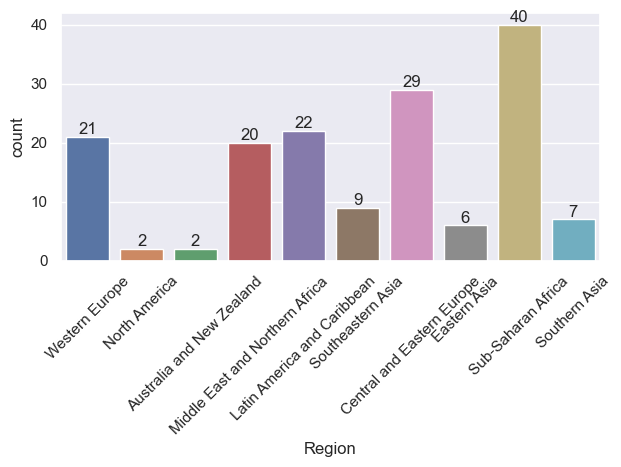

In [11]:
ax=sns.countplot(data=df,x=df['Region'])
for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

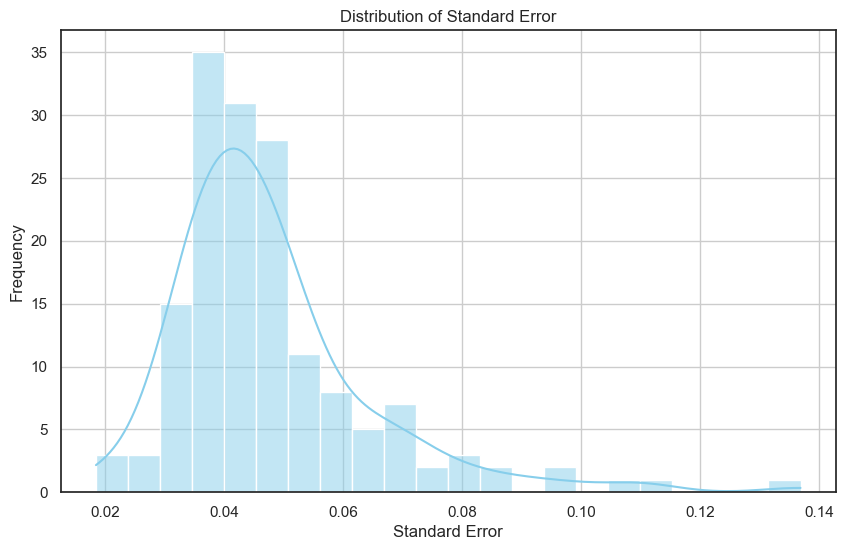

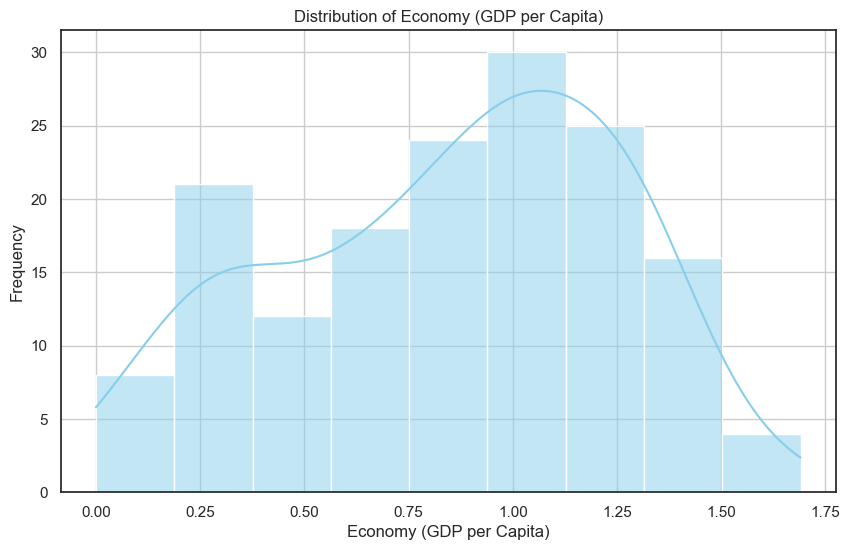

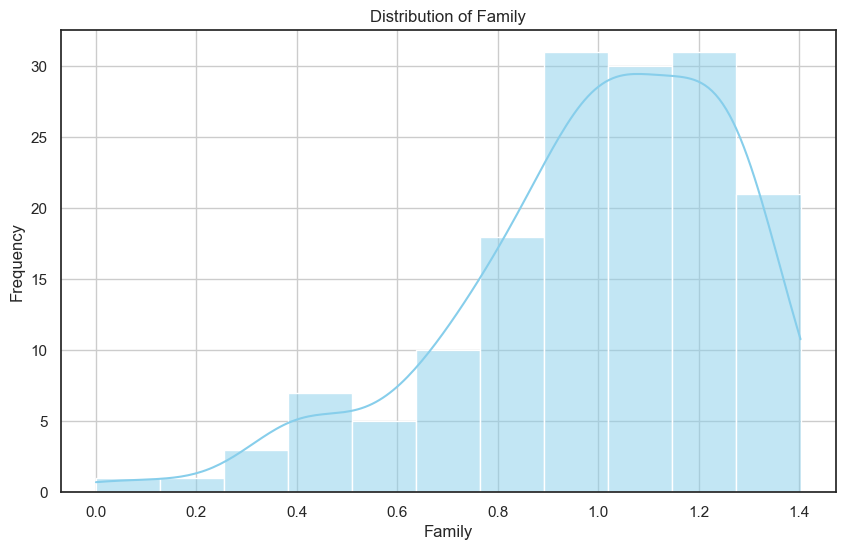

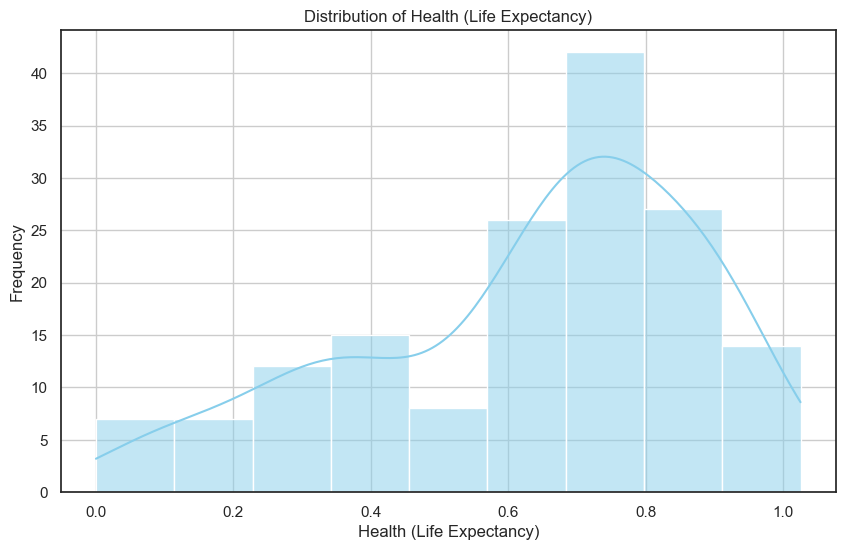

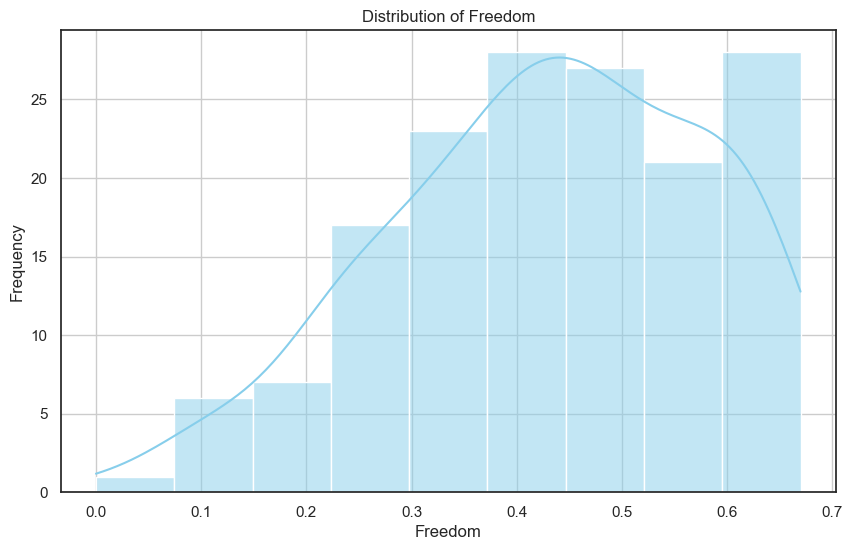

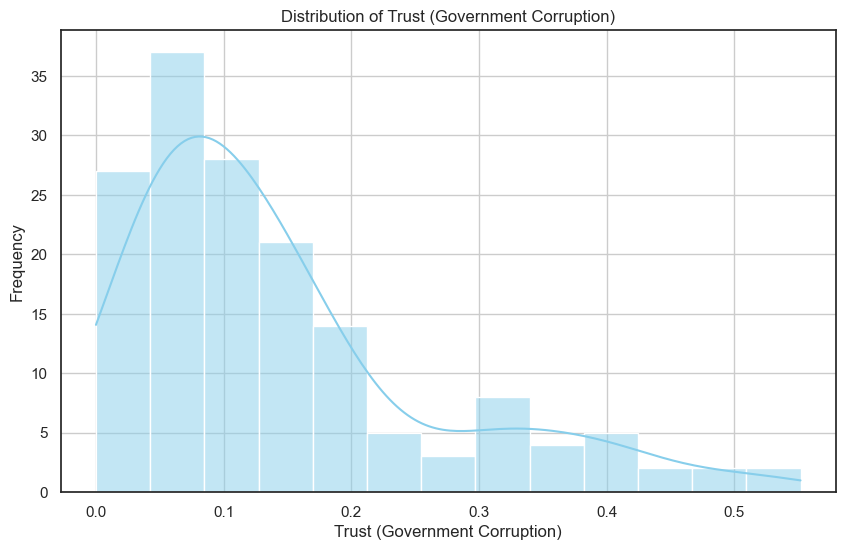

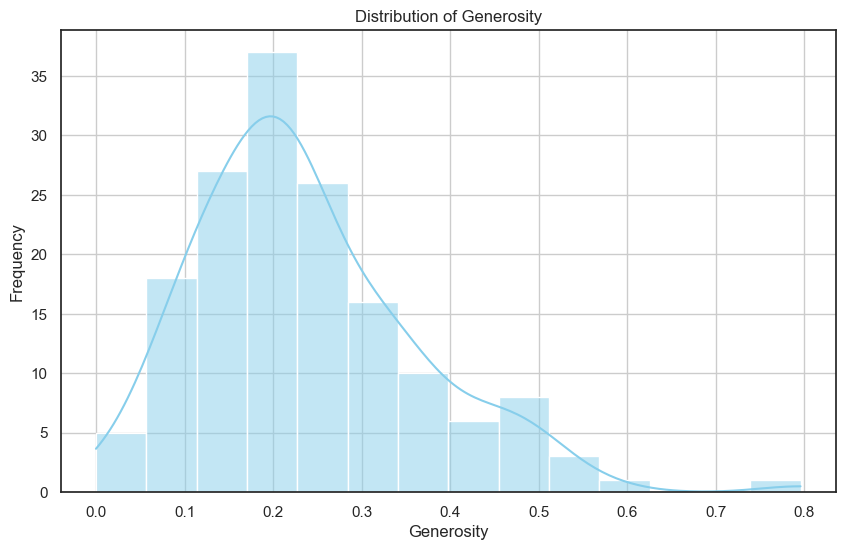

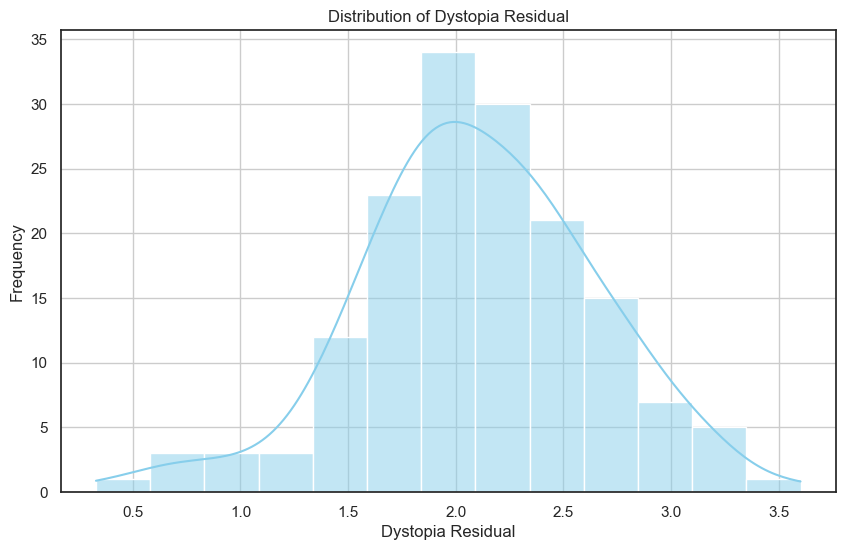

In [15]:
sns.set_style("white")
sns.set_palette('Set2')

columns_to_plot = [col for col in df.columns if col not in ['Region', 'Country','Happiness Rank','Happiness Score']]
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Data looks ok, no absurd skewness observed

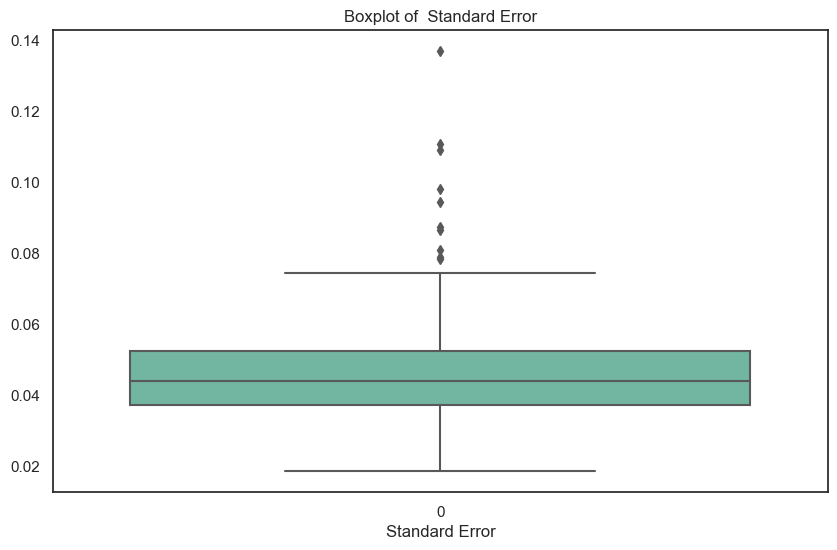

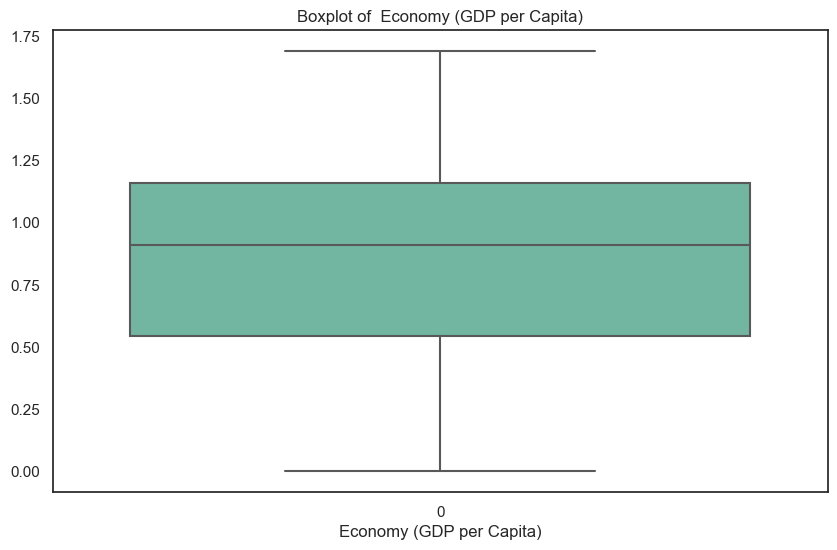

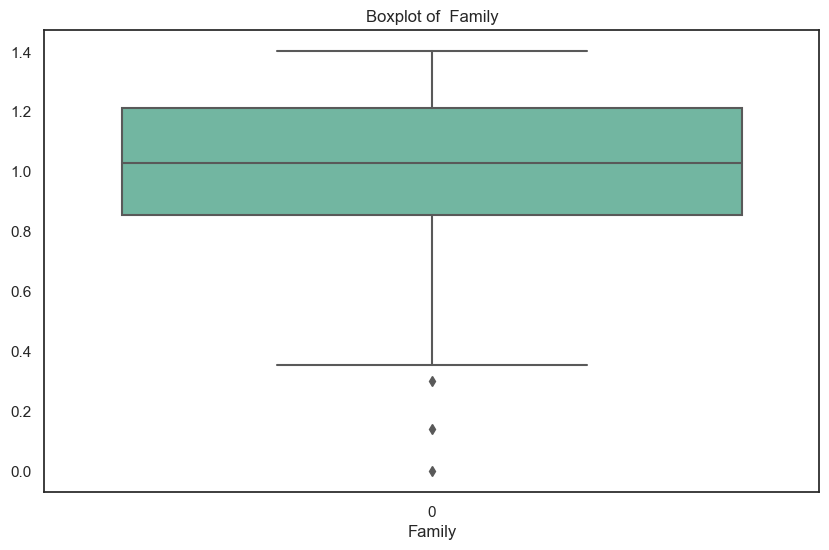

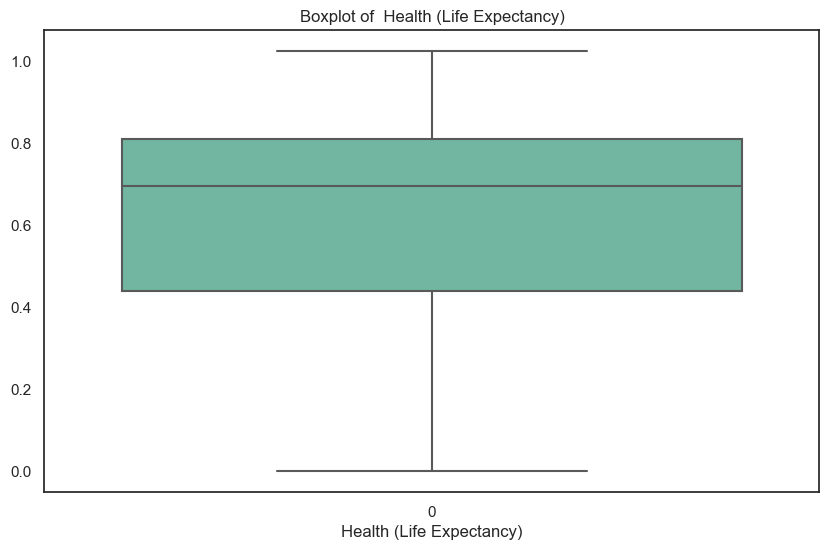

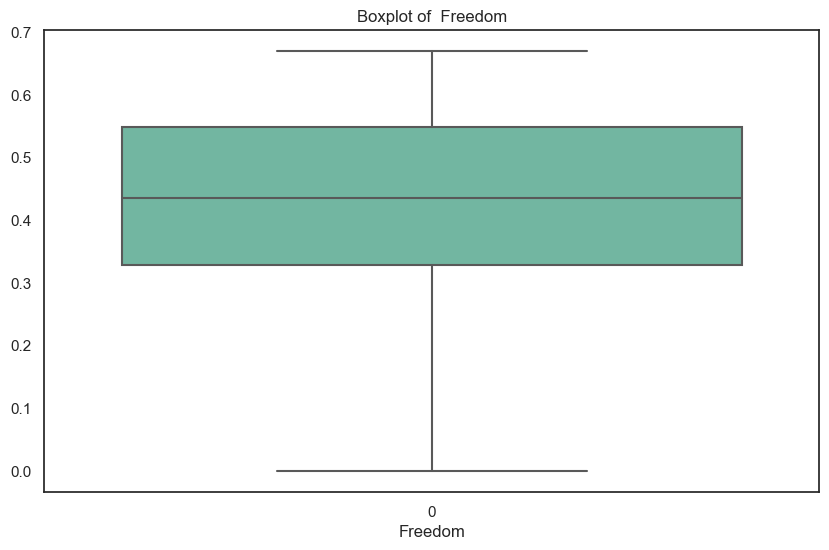

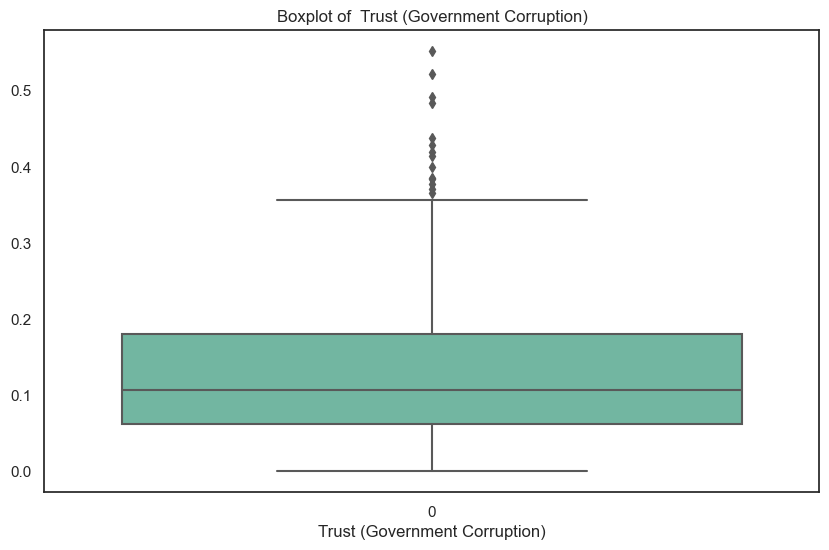

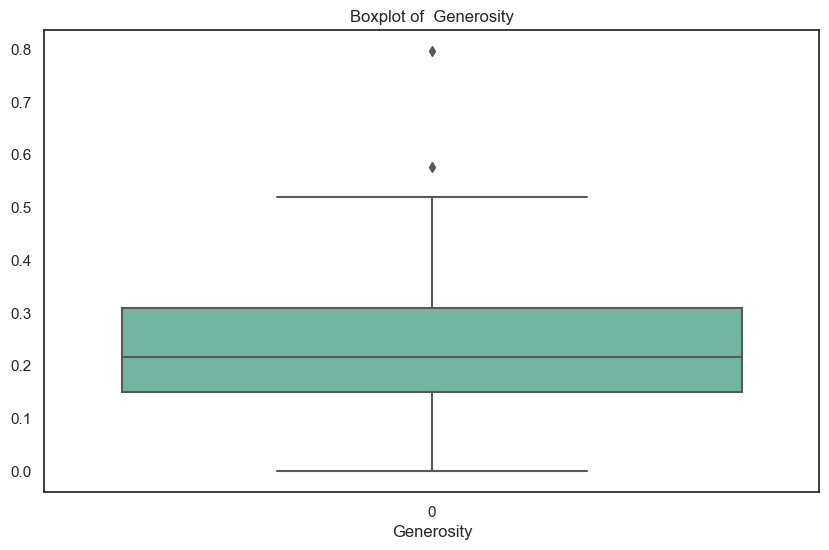

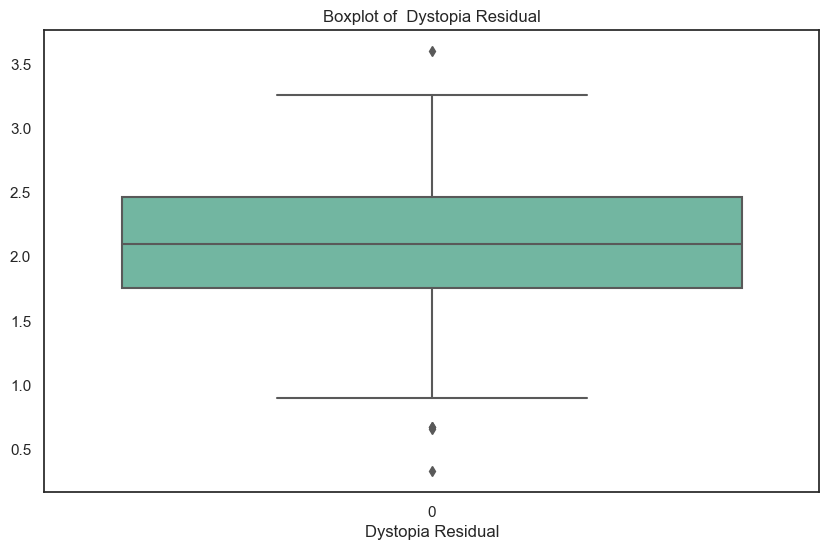

In [16]:
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(df[column])
    plt.title(f'Boxplot of  {column}')
    plt.xlabel(column)
    plt.show()

Few outliers are observed, but due to availability of limited data set, cannot drop the outliers as they can convey important information which will be lost if dropped. There is another possibility that the dataset itself is like that, and the outliers are indeed not outliers 

#### Bi-variate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dnyan\AppData\Local\Temp\ipykernel_18580\97904461.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

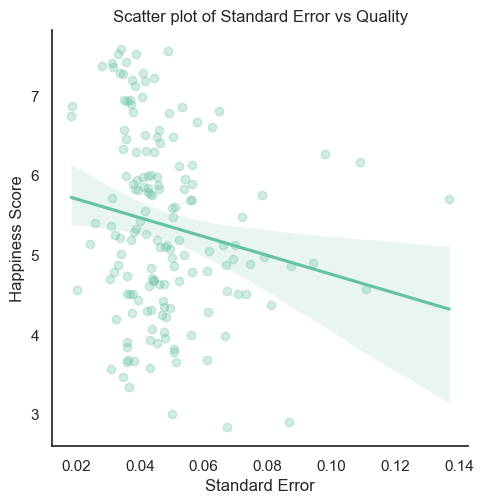

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dnyan\AppData\Local\Temp\ipykernel_18580\97904461.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

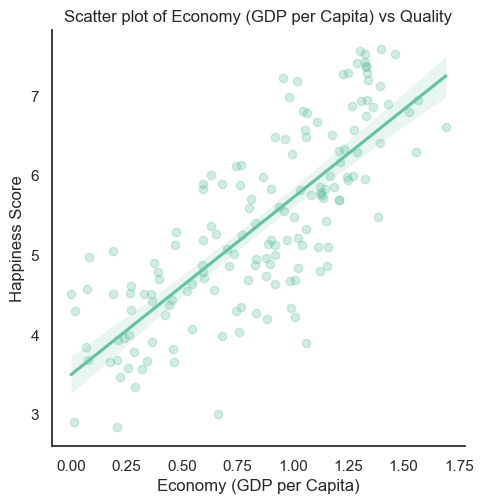

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dnyan\AppData\Local\Temp\ipykernel_18580\97904461.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

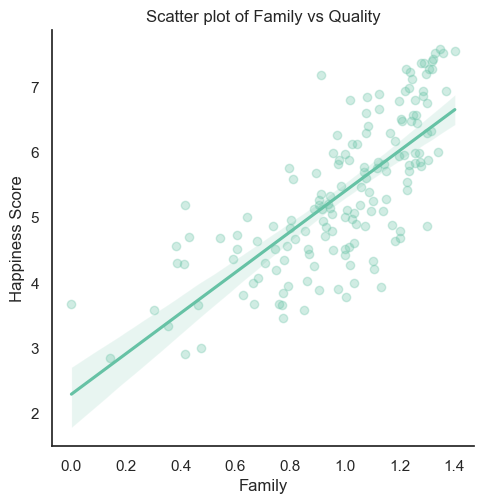

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dnyan\AppData\Local\Temp\ipykernel_18580\97904461.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

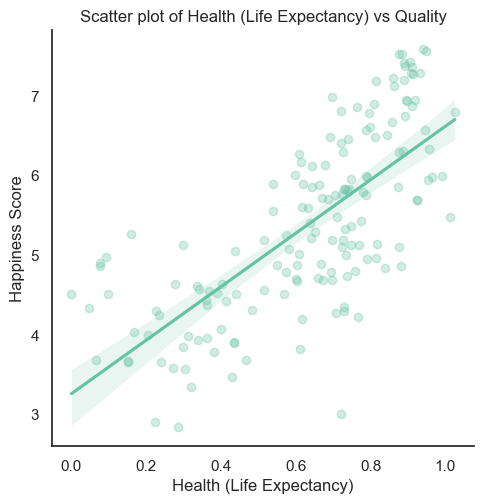

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dnyan\AppData\Local\Temp\ipykernel_18580\97904461.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

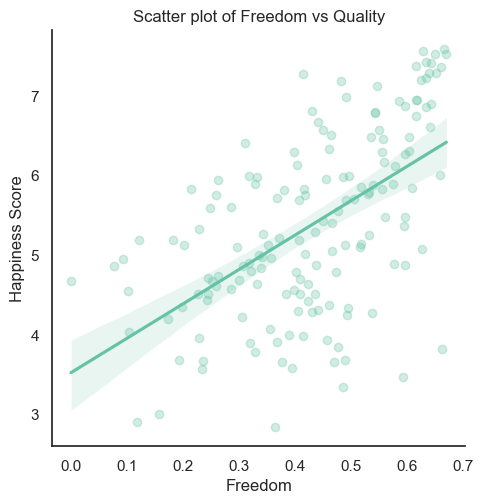

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dnyan\AppData\Local\Temp\ipykernel_18580\97904461.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

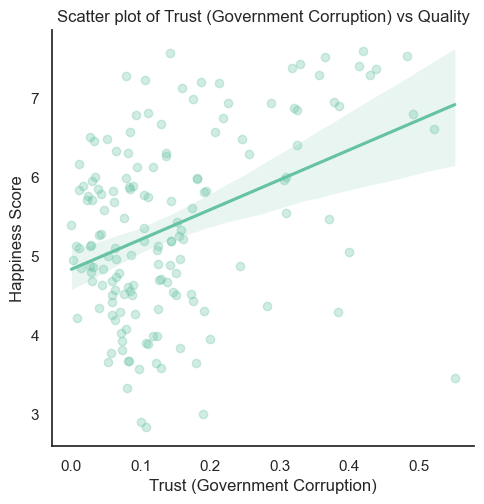

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dnyan\AppData\Local\Temp\ipykernel_18580\97904461.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

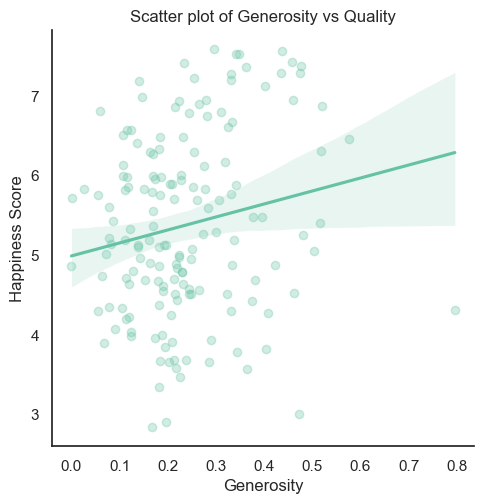

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dnyan\AppData\Local\Temp\ipykernel_18580\97904461.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

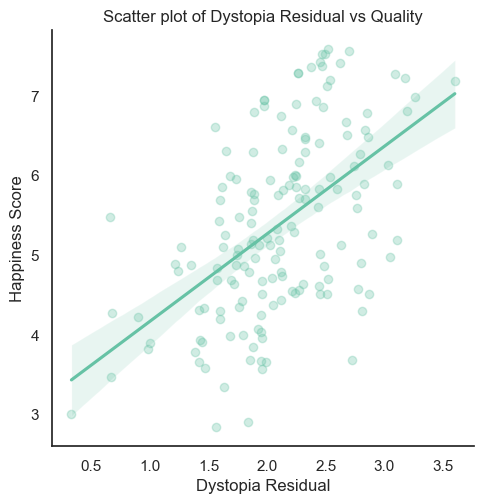

In [19]:
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.lmplot(x=column, y='Happiness Score', data=df, palette='Set2', scatter_kws={'alpha':0.3})
    plt.tight_layout()
    plt.title(f'Scatter plot of {column} vs Quality')
    plt.xlabel(column)
    plt.ylabel('Happiness Score')
    plt.show()

Strong relation between fetaures and target observed

#### Multi-variate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


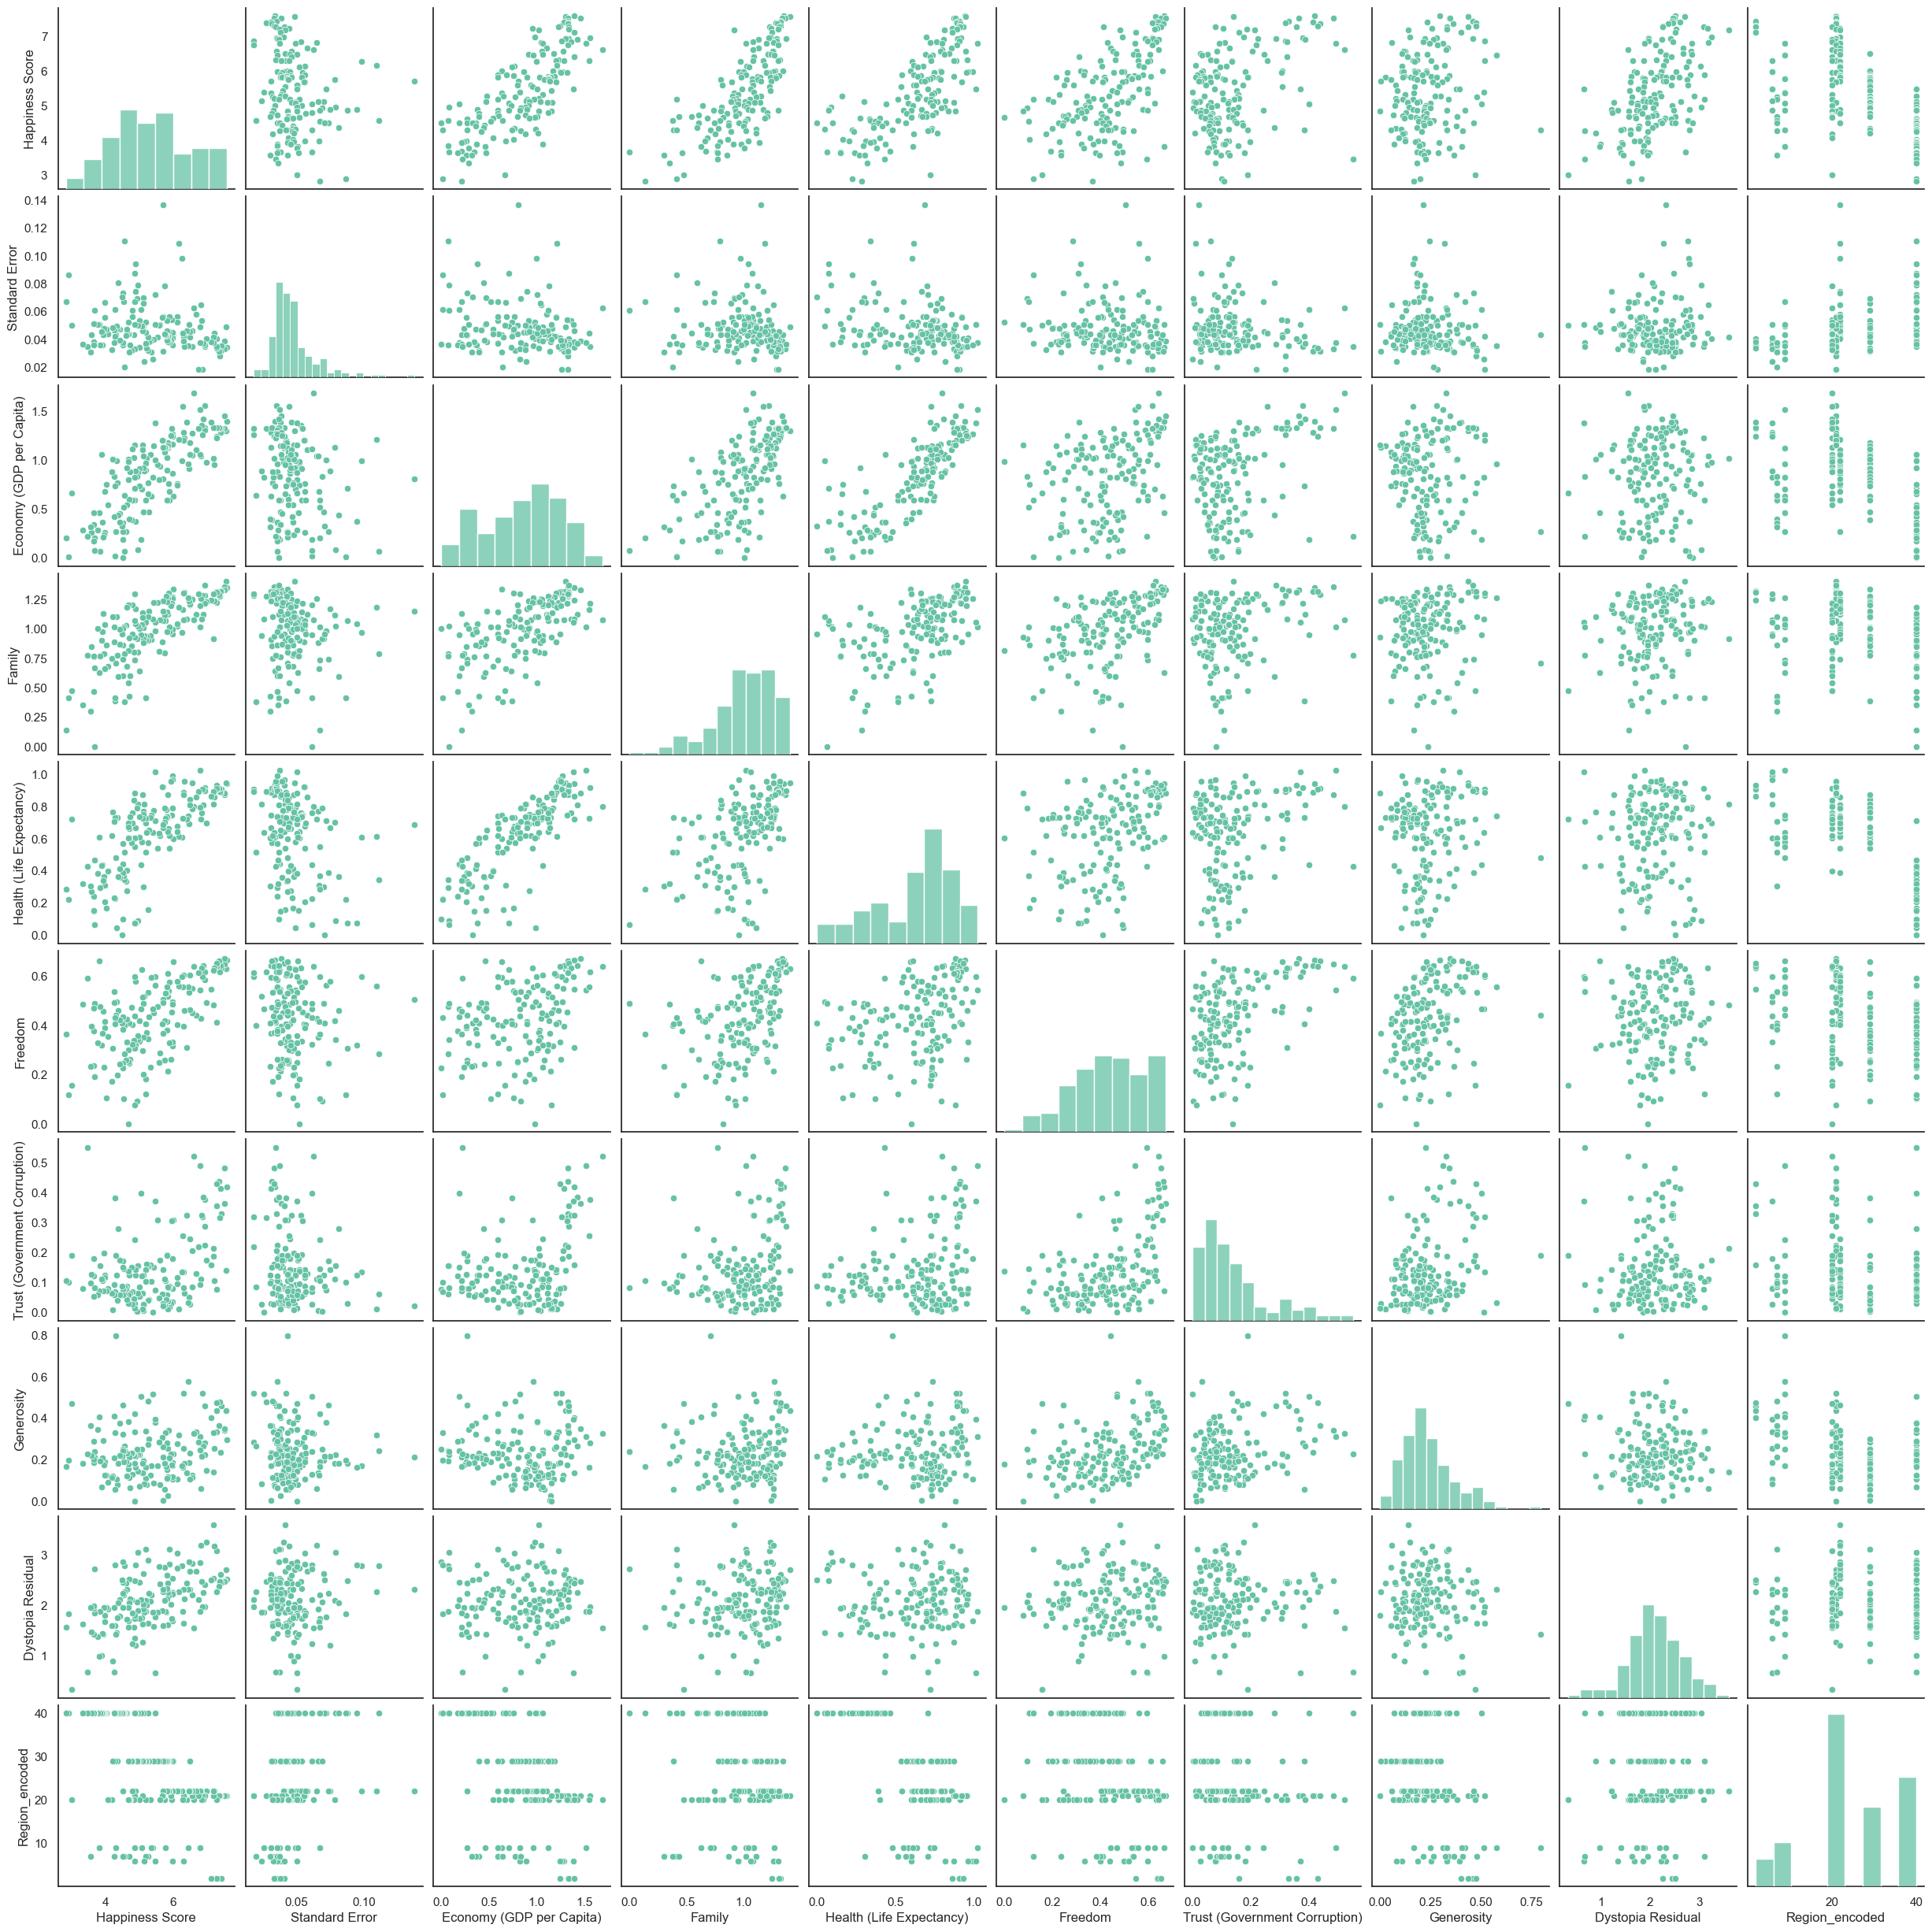

In [26]:
sns.pairplot(data=df)

#### Encoding Region Column

##### Frequency Encoding

In [20]:
region_frequency = df['Region'].value_counts().to_dict()
df['Region_encoded'] = df['Region'].map(region_frequency)

In [21]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_encoded
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,21
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,21
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,21
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,21
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2


In [22]:
df_final_frequncy_enc=df.copy()

In [23]:
df.drop(['Country','Region','Happiness Rank'],axis=1,inplace=True)

In [24]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_encoded
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,21
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,21
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,21
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,21
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2
...,...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,40
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,40
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,20
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,40


In [25]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Region_encoded                  -0.148111
dtype: float64

No skewness observed 

<Axes: >

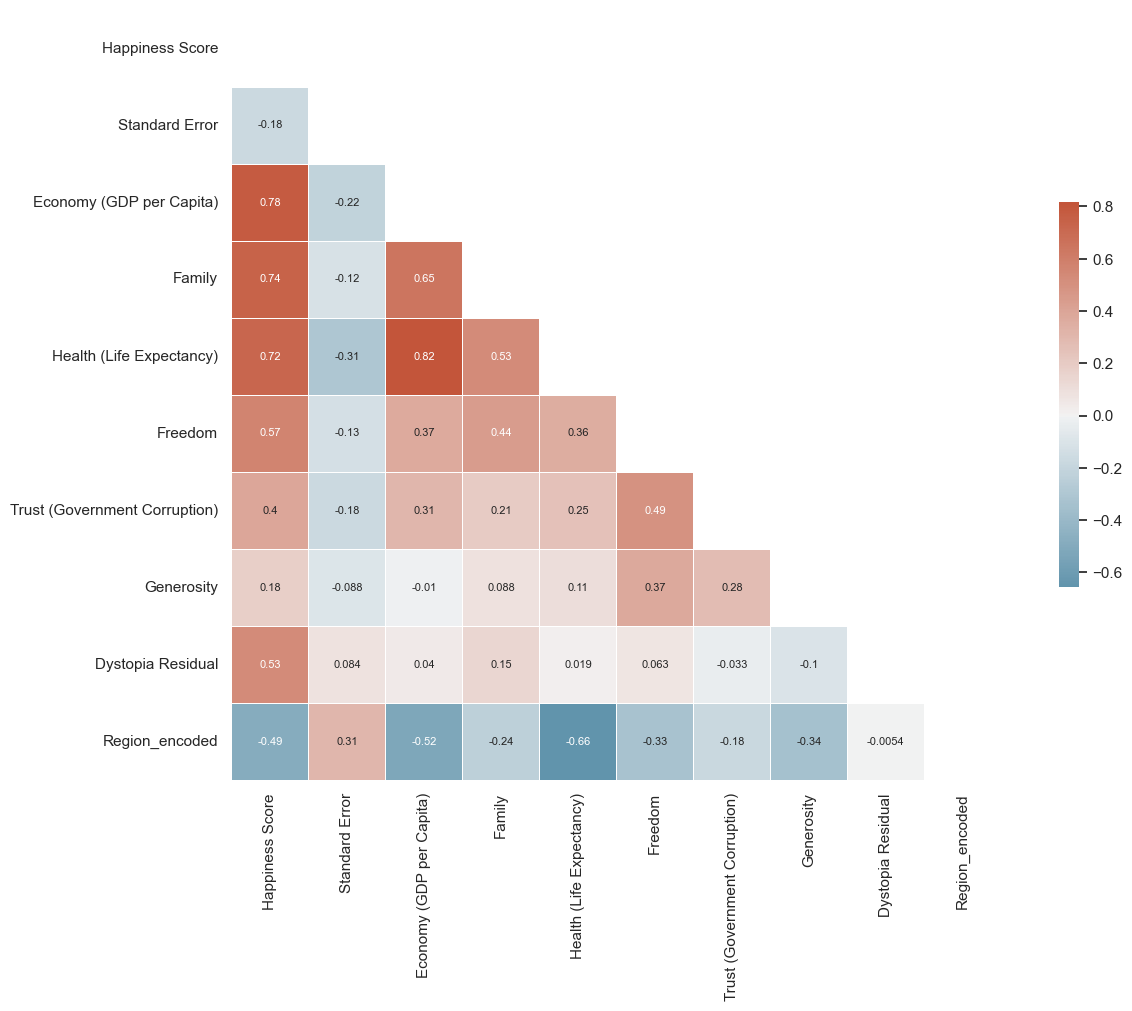

In [27]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
 
f, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

Multi-collinearity observed between multiple features. 
1. First Approach: Not dropping these features
2. Second Approach: Dropping highly correlated features

#### Scaling the Features

In [46]:
X=df.drop(['Happiness Score'],axis=1)
y=df['Happiness Score']

In [40]:
region_column = df['Region_encoded']

In [30]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [47]:
X_scaled=scaler.fit_transform(X)

X_scaled

array([[-0.80592569,  1.36962124,  1.32028142, ...,  0.47103971,
         0.75825809, -0.35571814],
       [ 0.05588945,  1.13522625,  1.51445776, ...,  1.57585637,
         1.09285682, -0.35571814],
       [-0.8544869 ,  1.19286069,  1.36105403, ...,  0.8242928 ,
         0.71233526, -0.35571814],
       ...,
       [ 0.13253425, -0.45524543, -1.90108634, ...,  1.85689094,
        -3.20843049, -0.44607741],
       [ 2.26396166, -2.06756644, -2.1184666 , ..., -0.31694987,
        -0.48198451,  1.361108  ],
       [ 1.13418227, -1.58633379, -3.13472485, ..., -0.5581534 ,
        -0.96361241,  1.361108  ]])

In [48]:
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)

X_scaled_df

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_encoded
0,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258,-0.355718
1,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857,-0.355718
2,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335,-0.355718
3,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893,-0.355718
4,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337,-2.072544
...,...,...,...,...,...,...,...,...,...
153,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925,1.361108
154,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967,1.361108
155,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430,-0.446077
156,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985,1.361108


### Modelling and Feature Selection

In [59]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import mean_squared_error, make_scorer

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=57)

In [52]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=13),
    "Lasso Regression": Lasso(random_state=13),
    "Decision Tree": DecisionTreeRegressor(random_state=13),
    "Random Forest": RandomForestRegressor(random_state=13),
    "Gradient Boosting": GradientBoostingRegressor(random_state=7),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(random_state=13),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

In [53]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R² Score": r2
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R² Score: {metrics['R² Score']:.2f}")
    print()

Model: Linear Regression
  Mean Absolute Error (MAE): 0.00
  Mean Squared Error (MSE): 0.00
  R² Score: 1.00

Model: Ridge Regression
  Mean Absolute Error (MAE): 0.01
  Mean Squared Error (MSE): 0.00
  R² Score: 1.00

Model: Lasso Regression
  Mean Absolute Error (MAE): 0.94
  Mean Squared Error (MSE): 1.20
  R² Score: -0.02

Model: Decision Tree
  Mean Absolute Error (MAE): 0.41
  Mean Squared Error (MSE): 0.24
  R² Score: 0.80

Model: Random Forest
  Mean Absolute Error (MAE): 0.25
  Mean Squared Error (MSE): 0.09
  R² Score: 0.93

Model: Gradient Boosting
  Mean Absolute Error (MAE): 0.21
  Mean Squared Error (MSE): 0.07
  R² Score: 0.94

Model: Support Vector Regressor
  Mean Absolute Error (MAE): 0.16
  Mean Squared Error (MSE): 0.05
  R² Score: 0.96

Model: XGBoost
  Mean Absolute Error (MAE): 0.30
  Mean Squared Error (MSE): 0.16
  R² Score: 0.87

Model: K-Nearest Neighbors
  Mean Absolute Error (MAE): 0.31
  Mean Squared Error (MSE): 0.16
  R² Score: 0.86



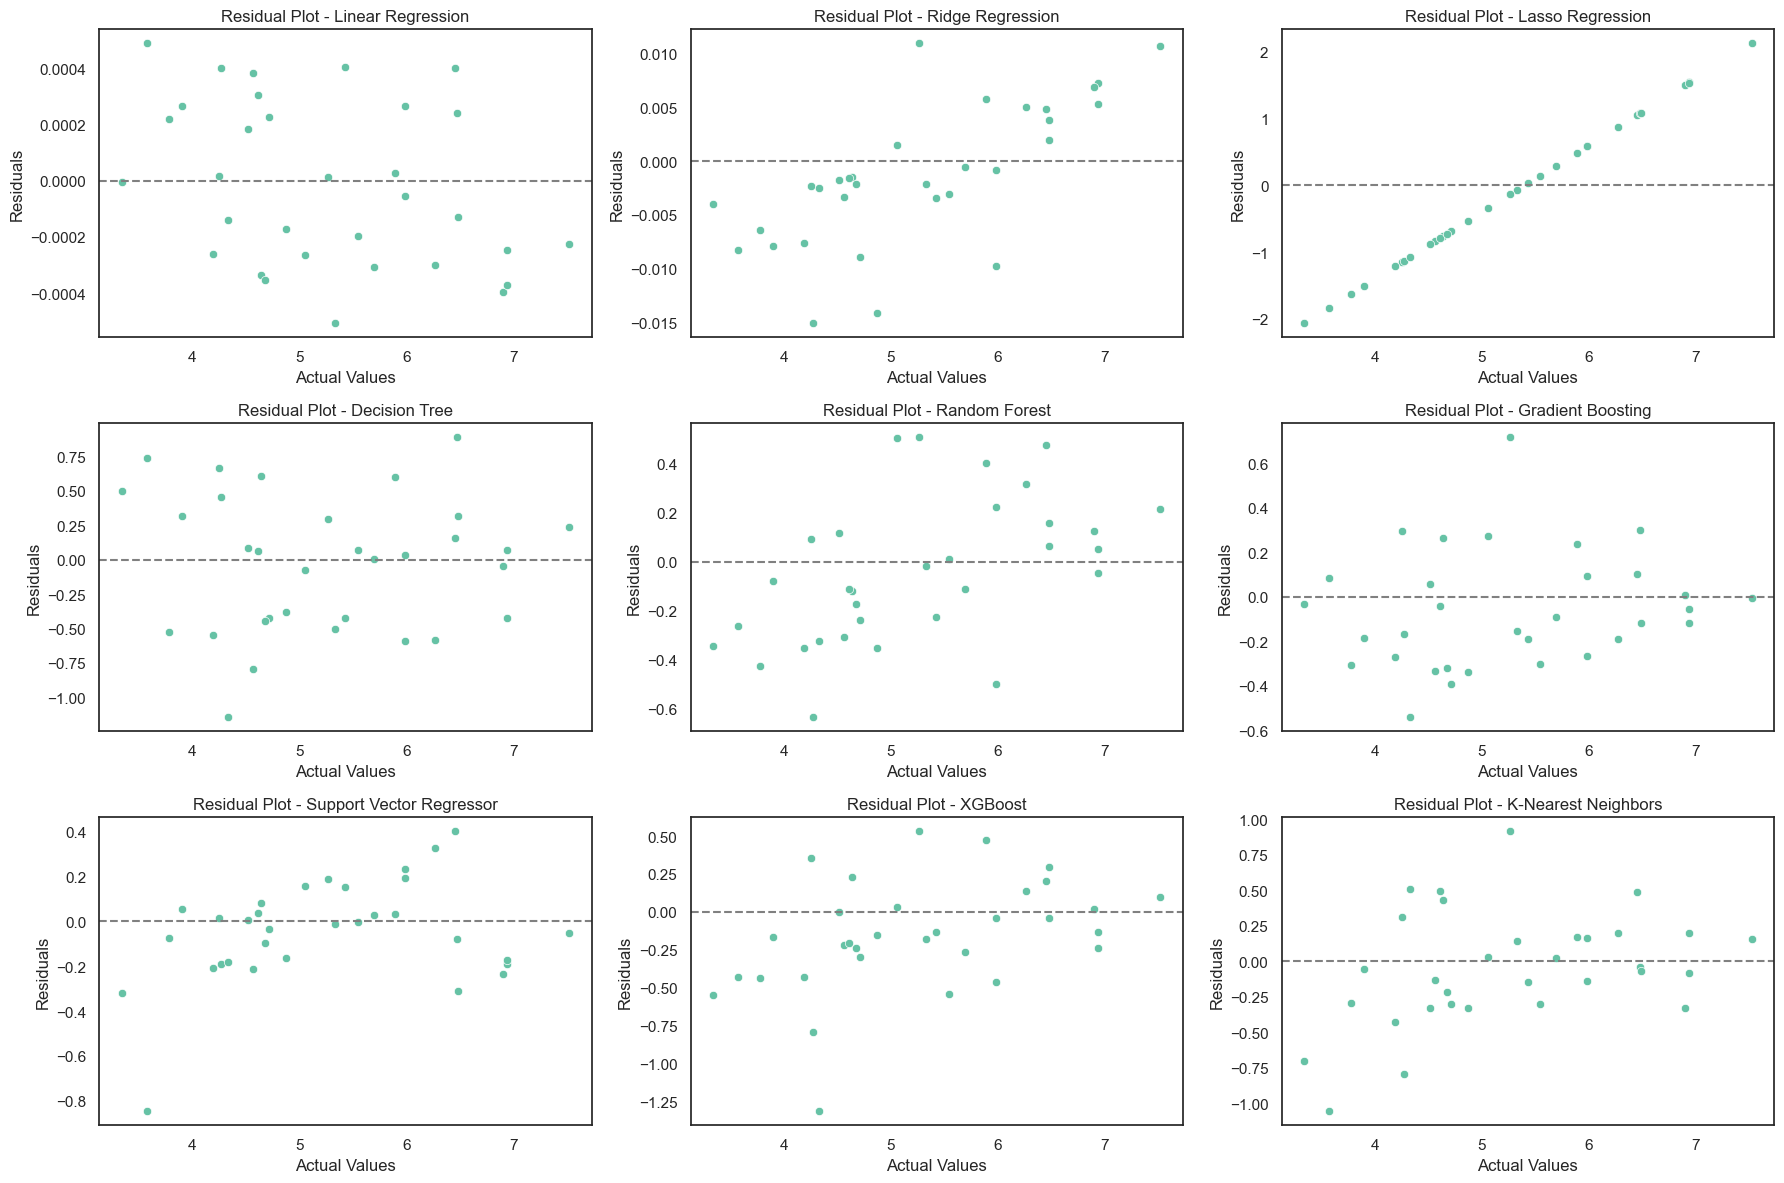

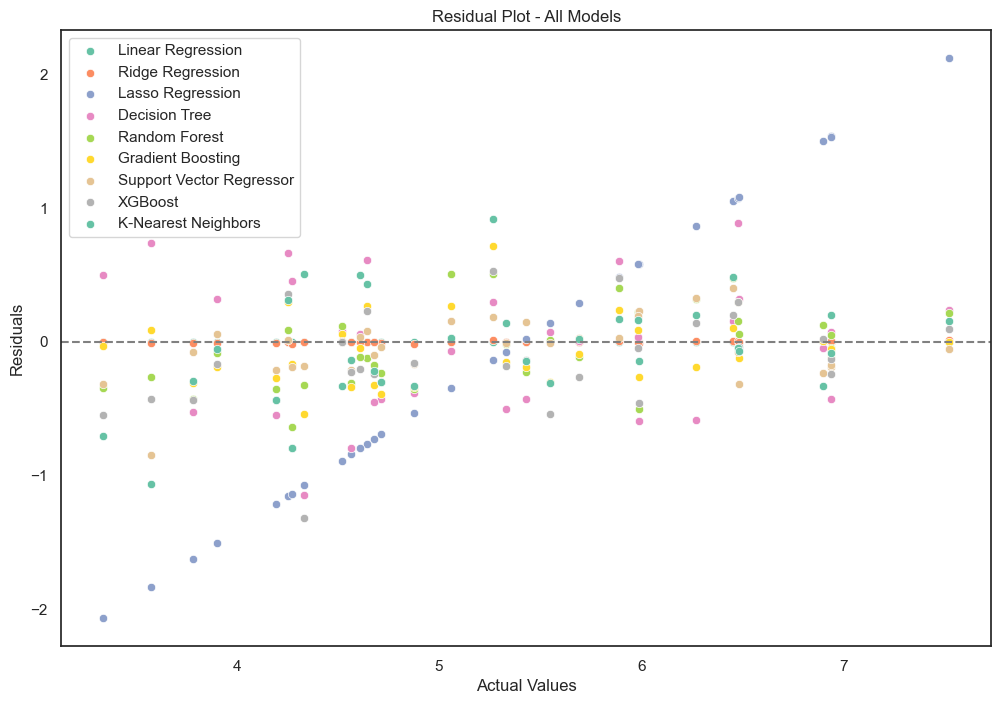

In [54]:
plt.figure(figsize=(18, 12))
for i, (model_name, model) in enumerate(models.items(), 1):
    plt.subplot(3, 3, i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    residuals = y_test - y_pred
    
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {model_name}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    residuals = y_test - y_pred
    
    sns.scatterplot(x=y_test, y=residuals, label=model_name)

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - All Models')
plt.legend()
plt.show()

Training Metrics:
  Mean Absolute Error (MAE): 0.00
  Mean Squared Error (MSE): 0.00
  R² Score: 1.00
Testing Metrics:
  Mean Absolute Error (MAE): 0.00
  Mean Squared Error (MSE): 0.00
  R² Score: 1.00
Cross-Validation R² Scores: [0.99999945 0.99999832 0.99999833 0.99999535 0.99999943]
Mean Cross-Validation R² Score: 1.00


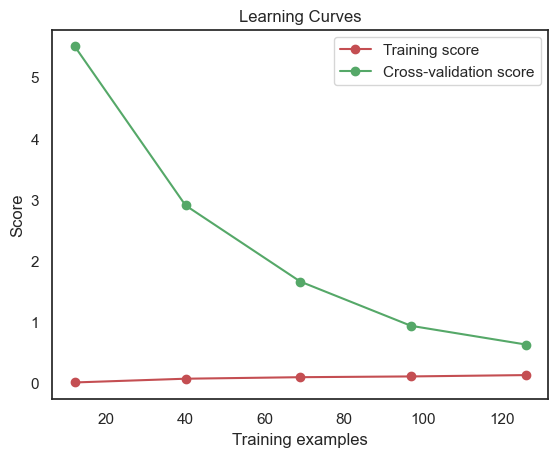

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"  Mean Squared Error (MSE): {mse_train:.2f}")
print(f"  R² Score: {r2_train:.2f}")

print(f"Testing Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"  Mean Squared Error (MSE): {mse_test:.2f}")
print(f"  R² Score: {r2_test:.2f}")

cv_scores = cross_val_score(lr, X_scaled_df, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {np.mean(cv_scores):.2f}")


train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error',
                                                        train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()